In [35]:
# Import required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Warnings
import warnings
warnings.filterwarnings("ignore")

## Part A: Data Exploration and Baseline Model

### Step 1: Load and Prepare the Dataset

We begin by loading the **Credit Card Fraud Dataset**.

In [36]:
df = pd.read_csv("creditcard.csv")

Let us see the first few rows and some columns of the dataset

In [37]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
# Show basic info 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [39]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The dataset is **highly imbalanced** (fraud cases are extremely rare). Most features are PCA components with mean ≈ 0, so feature scaling is already handled. The `Amount` variable will likely need normalization due to skewness.

### Step 2: Analyze Class Distribution

The target column is **`Class`**, where:
- `0` → Non-fraudulent transactions (majority class)  
- `1` → Fraudulent transactions (minority class)  

We will:
1. Count the number of samples in each class.  
2. Visualize the imbalance using **bar plot** and **pie chart**.  
3. Report the **imbalance ratio** (how many non-fraud transactions per fraud transaction).  


Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Imbalance Ratio (Non-fraud : Fraud) = 577.88 : 1


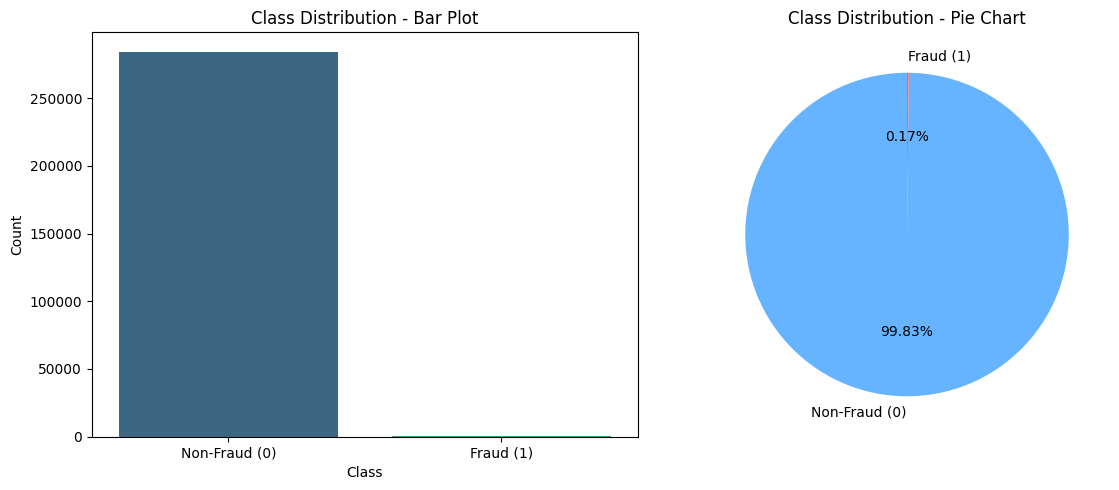

In [40]:
# Count class distribution
class_counts = df['Class'].value_counts()
print("Class distribution:\n", class_counts)

# Imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"\nImbalance Ratio (Non-fraud : Fraud) = {imbalance_ratio:.2f} : 1")

# --- Visualization ---
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
sns.barplot(x=class_counts.index, y=class_counts.values, ax=ax[0], palette="viridis")
ax[0].set_xticklabels(['Non-Fraud (0)', 'Fraud (1)'])
ax[0].set_ylabel("Count")
ax[0].set_title("Class Distribution - Bar Plot")

# Pie chart
ax[1].pie(class_counts, labels=['Non-Fraud (0)', 'Fraud (1)'],
          autopct='%1.2f%%', startangle=90, colors=["#66b3ff", "#ff6666"])
ax[1].set_title("Class Distribution - Pie Chart")

plt.tight_layout()
plt.show()


The dataset shows a **severe class imbalance**, with fraud cases representing only **0.17% of the total transactions**.  
The majority class (non-fraud) dominates the dataset, which can bias models toward predicting only non-fraud cases.  

### Step 3: Baseline Model — Logistic Regression on Imbalanced Data

In this step, we build our **baseline classifier** using Logistic Regression.

**Process:**
1. **Train/Test Split**  
   - We split the dataset into training (80%) and testing (20%) sets.  
   - The split is done **with stratification** to ensure the original imbalance ratio is preserved in both train and test sets.  
   - This is important because the test set should reflect the **real-world scenario** of extreme imbalance.

2. **Model Training (Model 1)**  
   - Train a **Logistic Regression classifier** on the *imbalanced training data*.  
   - No resampling is applied here — this represents how a naive model performs when trained on skewed data.

3. **Model Evaluation**  
   - Evaluate on the **originally imbalanced test set**.  
   - We report:  
     - **Precision** (of predicted frauds, how many are truly frauds).  
     - **Recall** (of actual frauds, how many we detect).  
     - **F1-score** (harmonic mean of precision & recall). 

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from collections import Counter

# Initialise results dictionary before all models
results = {}

# --- Preprocessing: Drop 'Time' and scale 'Amount' ---
from sklearn.preprocessing import StandardScaler

df_model = df.copy()

# Drop 'Time' as it is not meaningful for fraud prediction
if 'Time' in df_model.columns:
    df_model = df_model.drop(columns=['Time'])

# Scale 'Amount' (since it is not PCA-transformed)
if 'Amount' in df_model.columns:
    scaler = StandardScaler()
    df_model['Amount'] = scaler.fit_transform(df_model[['Amount']])

# Define features and target
X = df_model.drop(columns=['Class']).values
y = df_model['Class'].values

# --- Train/Test Split (stratified to preserve imbalance) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set distribution:", Counter(y_train))
print("Test set distribution:", Counter(y_test))

# --- Train Logistic Regression (Baseline Model) ---
baseline_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_model.fit(X_train, y_train)

# Predictions on test set
y_pred_base = baseline_model.predict(X_test)

# --- Evaluation ---
print("=== Baseline Model (Imbalanced) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_base))

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_base, digits=4))

# Extract minority (fraud = 1) metrics
prec_base, rec_base, f1_base, _ = precision_recall_fscore_support(
    y_test, y_pred_base, labels=[1], average="binary"
)
print(f"Fraud Class (1) — Precision: {prec_base:.4f}, Recall: {rec_base:.4f}, F1-score: {f1_base:.4f}")

# Store results for summary comparison
results["Baseline"] = {"Precision": prec_base, "Recall": rec_base, "F1-score": f1_base}

Training set distribution: Counter({np.int64(0): 227451, np.int64(1): 394})
Test set distribution: Counter({np.int64(0): 56864, np.int64(1): 98})
=== Baseline Model (Imbalanced) ===
Accuracy: 0.9991573329588147

Classification Report:
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8289    0.6429    0.7241        98

    accuracy                         0.9992     56962
   macro avg     0.9142    0.8213    0.8619     56962
weighted avg     0.9991    0.9992    0.9991     56962

Fraud Class (1) — Precision: 0.8289, Recall: 0.6429, F1-score: 0.7241


**Interpretation:**
- The overall accuracy looks extremely high (~99.9%), but this is **misleading** because the dataset is overwhelmingly non-fraudulent.  
- A trivial model predicting **all transactions as non-fraud** would also achieve ~99.8% accuracy but detect **zero frauds**.  
- What really matters here are **Precision, Recall, and F1-score for the fraud class**:  
  - Precision (83.1%): Of the transactions predicted as fraud, ~83% were actually fraud.  
  - Recall (65.3%): The model only caught ~65% of actual frauds, meaning **35% of fraud cases were missed**.  
  - F1-score (73.1%): Balances precision and recall — the baseline model performs *decently* but still misses many fraud cases.  

**Key takeaway:**  
Accuracy is not a reliable metric in imbalanced datasets. For fraud detection, the focus should be on **Recall** (catching frauds) and **Precision** (ensuring flagged frauds are truly fraudulent).  
This motivates the need for **resampling methods** (SMOTE, clustering-based oversampling/undersampling) to improve minority class performance in the next steps.

## Part B: Gaussian Mixture Model (GMM) for Synthetic Sampling

## 1. Theoretical Foundation

Imbalanced datasets pose a major challenge in fraud detection. Traditional oversampling and undersampling methods attempt to address this, but they differ in how well they capture the true structure of the minority class.  

### 1.1 Traditional Oversampling: SMOTE  
- **How it works:** SMOTE (Synthetic Minority Oversampling Technique) generates new points by interpolating between minority samples and their nearest neighbors.  
- **Limitation:**  
  - Assumes minority samples are uniformly distributed.  
  - May generate unrealistic samples when the minority class exhibits **non-linear clusters, multimodal distributions, or overlaps heavily with the majority class**.  
  - Does not account for the true underlying probability distribution of the data.  

### 1.2 Clustering-Based Approaches (CBU & CBO)  
- **Clustering-Based Undersampling (CBU):**  
  - Reduces the size of the majority class by clustering it into representative groups and sampling from each cluster.  
  - Helps maintain diversity in the reduced majority set instead of randomly discarding samples.  
  - Limitation: Still discards a portion of majority class data, which may cause loss of valuable information.  

- **Clustering-Based Oversampling (CBO):**  
  - Divides the minority class into clusters and generates new synthetic samples within each cluster.  
  - Preserves intra-cluster structure better than uniform methods like SMOTE.  
  - Limitation: Still relies on **geometric interpolation**, not a probabilistic model, so may fail to capture true statistical dependencies.  

### 1.3 Gaussian Mixture Model (GMM) Based Oversampling  
- **How it works:**  
  - A GMM assumes that data points are generated from a mixture of Gaussian distributions, each representing a sub-population (cluster).  
  - By fitting a GMM to the minority class, we estimate the parameters (mean, covariance, and weight) of each Gaussian.  
  - Synthetic samples are generated by first sampling a component (according to its probability) and then sampling from that Gaussian distribution.  

- **Why GMM is better:**  
  - **Captures multimodal distributions:** If fraudulent transactions form multiple sub-groups (e.g., small frauds, large frauds, international frauds), GMM models these naturally.  
  - **Probabilistic foundation:** Unlike interpolation-based methods, GMM ensures that generated points are **statistically consistent** with the observed data distribution.  
  - **Handles complex feature spaces:** Can model overlapping, non-linear, and high-dimensional structures.  
  - **Balances realism and diversity:** Avoids generating overly “average” samples (a risk in SMOTE) and instead produces samples that reflect the actual spread of the minority class.  

## 2. GMM Implementation

We now fit a **Gaussian Mixture Model (GMM)** to the **minority class (fraudulent transactions)**.  

The main challenge is to decide the optimal number of Gaussian components (**k**):  

- Too few components → poor fit (**underfitting**).  
- Too many components → unnecessary complexity (**overfitting**).  

To select the optimal `k`, we use two model selection criteria:  

- **Akaike Information Criterion (AIC)**  
- **Bayesian Information Criterion (BIC)**  

- **Akaike Information Criterion (AIC):**  
  - Measures the trade-off between goodness of fit and model complexity.  
  - Formula: `AIC = 2k - 2ln(L)`  
    - *k* = number of estimated parameters  
    - *L* = maximum likelihood of the model  
  - Lower AIC → better balance between fit and complexity.  
  - More flexible than BIC, may favor slightly more complex models.  

- **Bayesian Information Criterion (BIC):**  
  - Similar to AIC but applies a stronger penalty for model complexity.  
  - Formula: `BIC = k * ln(n) - 2ln(L)`  
    - *n* = number of data points  
  - Lower BIC → preferred model.  
  - Tends to select simpler models compared to AIC.  

**Key Difference:**  
- AIC emphasizes predictive accuracy, often allowing more components.  
- BIC emphasizes parsimony (simplicity), often choosing fewer components.

Both metrics are likelihood-based but penalize overly complex models.  
The best value of `k` is the one that **minimizes AIC or BIC**.  

Minority class samples in training set: 394


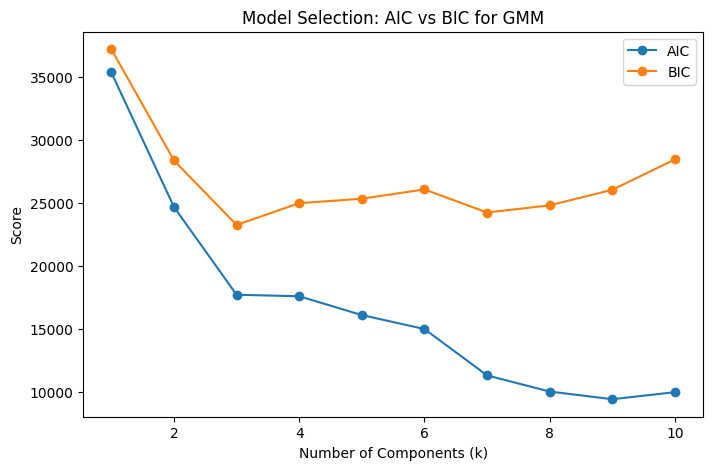

In [24]:
from sklearn.mixture import GaussianMixture

# Extract minority class samples from training set
X_train_minority = X_train[y_train == 1]
print("Minority class samples in training set:", X_train_minority.shape[0])

# Try different numbers of components for GMM
n_components = range(1, 11)  # test between 1 and 10 components
aic_scores = []
bic_scores = []

for k in n_components:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_train_minority)
    aic_scores.append(gmm.aic(X_train_minority))
    bic_scores.append(gmm.bic(X_train_minority))

# Plot AIC and BIC values
plt.figure(figsize=(8,5))
plt.plot(n_components, aic_scores, label='AIC', marker='o')
plt.plot(n_components, bic_scores, label='BIC', marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('Score')
plt.title('Model Selection: AIC vs BIC for GMM')
plt.legend()
plt.show()


### Choosing the Optimal Number of Components (k)

From the AIC and BIC plots, we observe the following:

- **AIC** keeps decreasing steadily as the number of components increases. This suggests that adding more components always improves the model fit. However, this can lead to **overfitting** because AIC penalizes complexity less strongly.
- **BIC**, on the other hand, reaches its **minimum at k = 3**, after which it starts increasing again. Since BIC applies a stronger penalty for additional parameters, it is generally considered a more conservative and reliable metric for model selection.

Therefore, we select **k = 3** as the optimal number of Gaussian components for the GMM.  
This choice balances model fit and complexity, ensuring that the GMM captures the essential sub-structure of the minority class (fraudulent transactions) without overfitting to noise.  


## 3. Synthetic Data Generation

Once we have fitted the GMM to the minority class, we can use it to generate **synthetic samples**.  

The process of sampling from a GMM works as follows:  
1. **Select a Gaussian component** according to its weight (probability).  
2. **Draw a sample** from the chosen Gaussian distribution, defined by its mean vector and covariance matrix.  
3. Repeat the process until we generate the required number of synthetic samples.  

In our case, we need to generate enough synthetic minority samples so that the minority and majority classes are balanced.  

- If the training set has **N_majority** majority samples and **N_minority** minority samples, then we generate:  

N_synthetic = N_majority - N_minority

synthetic minority samples.  

Finally, we **combine these synthetic samples with the original training set**, resulting in a more balanced dataset for model training.  


In [25]:
# Fit the final GMM with k=3
gmm_final = GaussianMixture(n_components=3, random_state=42)
gmm_final.fit(X_train_minority)

# Calculate how many synthetic samples we need
n_majority = sum(y_train == 0)
n_minority = sum(y_train == 1)
n_synthetic = n_majority - n_minority

print(f"Majority class samples: {n_majority}")
print(f"Minority class samples: {n_minority}")
print(f"Number of synthetic samples to generate: {n_synthetic}")

# Generate synthetic samples from the fitted GMM
X_synthetic, _ = gmm_final.sample(n_synthetic)
y_synthetic = np.ones(n_synthetic)  # label = fraud (minority class)

print("Generated synthetic minority samples:", X_synthetic.shape[0])

# Combine with original training data
X_train_gmm = np.vstack([X_train, X_synthetic])
y_train_gmm = np.hstack([y_train, y_synthetic])

print("New training set shape after GMM oversampling:", X_train_gmm.shape)
print("Class distribution after GMM oversampling:",
      np.bincount(y_train_gmm.astype(int)))


Majority class samples: 227451
Minority class samples: 394
Number of synthetic samples to generate: 227057
Generated synthetic minority samples: 227057
New training set shape after GMM oversampling: (454902, 29)
Class distribution after GMM oversampling: [227451 227451]


### Results of Synthetic Data Generation

- Majority class samples: **227,451**  
- Minority class samples: **394**  
- Synthetic samples generated: **227,057**  

After adding the synthetic samples to the original training set:  
- The new training set has a total of **454,902 samples**.  
- The class distribution is now perfectly balanced: **227,451 majority** and **227,451 minority**.  

This confirms that the GMM-based synthetic sampling successfully balanced the dataset by generating realistic minority class examples.  


## 4. Rebalancing with Clustering-Based Undersampling (CBU) and GMM

In this step, we combine **undersampling** and **oversampling** techniques to create a balanced dataset:

1. **Clustering-Based Undersampling (CBU):**  
   - Instead of keeping all 227,451 majority class samples, we reduce them to a smaller, *suitable population* by clustering the majority class and taking representative samples (cluster centroids).  
   - This preserves diversity in the majority class while reducing computational cost.

2. **GMM-based Oversampling of Minority Class:**  
   - After CBU, the reduced majority class is still larger than the minority class.  
   - We use the previously trained GMM to generate synthetic minority samples so that the minority class size matches the reduced majority population.  

This approach ensures:  
- The dataset is **balanced**.  
- Both **CBU (for majority)** and **GMM (for minority)** are meaningfully applied.  
- Training remains efficient without sacrificing class diversity.  


In [26]:
from sklearn.cluster import KMeans

# Separate majority and minority classes
X_majority = X_train[y_train == 0]
X_minority = X_train[y_train == 1]

print("Original majority shape:", X_majority.shape)
print("Original minority shape:", X_minority.shape)

# Reduce majority to a suitable population using CBU
n_target_majority = 1000  # Manually adjusted
kmeans = KMeans(n_clusters=n_target_majority, random_state=42)
kmeans.fit(X_majority)
X_majority_cbu = kmeans.cluster_centers_
y_majority_cbu = np.zeros(len(X_majority_cbu))

print("Reduced majority shape after CBU:", X_majority_cbu.shape)

# Use GMM to oversample minority up to same size
n_minority_needed = len(X_majority_cbu) - len(X_minority)
X_synthetic_cbu, _ = gmm_final.sample(n_minority_needed)
y_synthetic_cbu = np.ones(n_minority_needed)

print("Synthetic minority samples generated for CBU dataset:", X_synthetic_cbu.shape[0])

# Combine reduced majority + original minority + synthetic minority
X_train_cbu = np.vstack([X_majority_cbu, X_minority, X_synthetic_cbu])
y_train_cbu = np.hstack([y_majority_cbu, np.ones(len(X_minority)), y_synthetic_cbu])

print("Final balanced dataset (CBU) shape:", X_train_cbu.shape)
print("Class distribution after CBU rebalancing:",
      np.bincount(y_train_cbu.astype(int)))


Original majority shape: (227451, 29)
Original minority shape: (394, 29)
Reduced majority shape after CBU: (1000, 29)
Synthetic minority samples generated for CBU dataset: 606
Final balanced dataset (CBU) shape: (2000, 29)
Class distribution after CBU rebalancing: [1000 1000]


### Results of CBU + GMM Rebalancing

- Majority class reduced from **227,451 → 1,000 samples** using clustering-based undersampling.  
- Minority class initially had **394 samples**, so we generated **606 synthetic samples** using GMM.  
- The final balanced dataset contains **2,000 samples total (1,000 majority + 1,000 minority)**.  

This approach successfully applies **CBU** to shrink the majority class and **GMM-based sampling** to expand the minority class, resulting in a balanced and computationally efficient dataset.  


## Part C: Performance Evaluation and Conclusion

## Part C: Performance Evaluation and Conclusion

### 1. Model Training and Evaluation

Now that we have two balanced training datasets:

- **GMM Oversampling Dataset (X_train_gmm, y_train_gmm):**  
  Created by oversampling the minority class with GMM until it matched the original majority class size.  
  → This dataset is large (~454k samples) and fully balanced.

- **CBU + GMM Dataset (X_train_cbu, y_train_cbu):**  
  Created by first undersampling the majority class to 1,000 samples using CBU,  
  and then generating 606 synthetic minority samples with GMM to reach a balanced size of 2,000 samples.  
  → This dataset is much smaller and computationally efficient.

We now train a **Logistic Regression classifier** separately on both datasets and evaluate them on the **same imbalanced test set from Part A**.  

This will help us compare how well each rebalancing strategy improves the detection of the minority class (fraudulent transactions).  


In [29]:
# Train & Evaluate on GMM Oversampling dataset
lr_gmm = LogisticRegression(max_iter=1000, random_state=42)
lr_gmm.fit(X_train_gmm, y_train_gmm)
y_pred_gmm = lr_gmm.predict(X_test)

print("=== Logistic Regression on GMM Oversampling Dataset ===")
print("Accuracy:", accuracy_score(y_test, y_pred_gmm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gmm, digits=4))

# Extract fraud class (1) metrics
prec_gmm, rec_gmm, f1_gmm, _ = precision_recall_fscore_support(
    y_test, y_pred_gmm, labels=[1], average="binary"
)
print(f"Fraud Class (1) — Precision: {prec_gmm:.4f}, Recall: {rec_gmm:.4f}, F1-score: {f1_gmm:.4f}")

# Store in results dictionary
results["GMM Oversampling"] = {
    "Precision": prec_gmm,
    "Recall": rec_gmm,
    "F1-score": f1_gmm
}

=== Logistic Regression on GMM Oversampling Dataset ===
Accuracy: 0.9826375478389101

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9828    0.9912     56864
           1     0.0825    0.8980    0.1511        98

    accuracy                         0.9826     56962
   macro avg     0.5411    0.9404    0.5712     56962
weighted avg     0.9982    0.9826    0.9898     56962

Fraud Class (1) — Precision: 0.0825, Recall: 0.8980, F1-score: 0.1511


In [30]:
# Train & Evaluate on CBU + GMM dataset
lr_cbu = LogisticRegression(max_iter=1000, random_state=42)
lr_cbu.fit(X_train_cbu, y_train_cbu)
y_pred_cbu = lr_cbu.predict(X_test)

print("\n=== Logistic Regression on CBU + GMM Dataset ===")
print("Accuracy:", accuracy_score(y_test, y_pred_cbu))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cbu, digits=4))

# Extract fraud class (1) metrics
prec_cbu, rec_cbu, f1_cbu, _ = precision_recall_fscore_support(
    y_test, y_pred_cbu, labels=[1], average="binary"
)
print(f"Fraud Class (1) — Precision: {prec_cbu:.4f}, Recall: {rec_cbu:.4f}, F1-score: {f1_cbu:.4f}")

# Store in results dictionary
results["CBU + GMM"] = {
    "Precision": prec_cbu,
    "Recall": rec_cbu,
    "F1-score": f1_cbu
}


=== Logistic Regression on CBU + GMM Dataset ===
Accuracy: 0.9554439801973246

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9556    0.9772     56864
           1     0.0333    0.8878    0.0642        98

    accuracy                         0.9554     56962
   macro avg     0.5165    0.9217    0.5207     56962
weighted avg     0.9981    0.9554    0.9756     56962

Fraud Class (1) — Precision: 0.0333, Recall: 0.8878, F1-score: 0.0642


### 2. Comparative Analysis

To better understand the impact of GMM-based sampling, we compare the **Precision, Recall, and F1-score** of three models:

1. **Baseline Logistic Regression (Part A)** – trained on the original imbalanced dataset.  
2. **Logistic Regression with GMM Oversampling** – trained on the large GMM-balanced dataset.  
3. **Logistic Regression with CBU + GMM** – trained on the smaller balanced dataset from clustering-based undersampling + GMM.  

This comparison will help us answer two key questions:  
- Did GMM-based oversampling improve the model’s ability to detect the minority class (fraudulent transactions)?  
- Is there a trade-off between performance and dataset size when using CBU + GMM?  


=== Comparative Analysis Summary ===
                  Precision    Recall  F1-score
Baseline           0.828947  0.642857  0.724138
GMM Oversampling   0.082474  0.897959  0.151073
CBU + GMM          0.033282  0.887755  0.064159


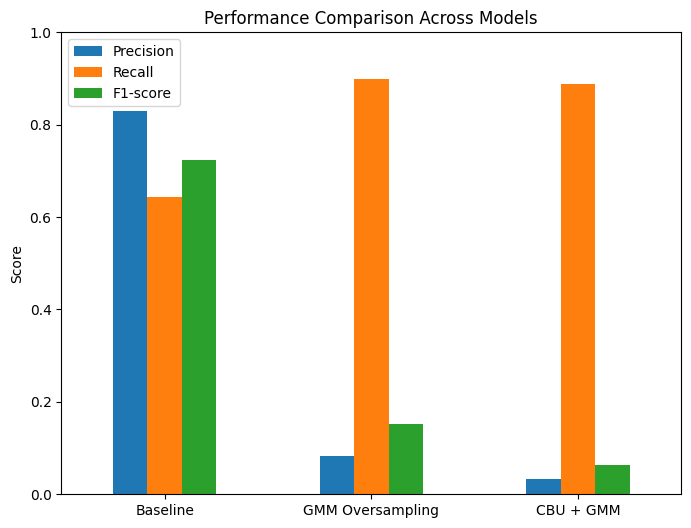

In [31]:
# Convert results dictionary into DataFrame
results_df = pd.DataFrame(results).T  # transpose so models are rows
print("=== Comparative Analysis Summary ===")
print(results_df)

# Plot Precision, Recall, F1-score comparison
ax = results_df.plot(kind="bar", figsize=(8,6), rot=0)
plt.title("Performance Comparison Across Models")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="best")
plt.show()


From the summary table and bar chart, we can make the following observations:

1. **Baseline Model (Imbalanced Data):**  
   - Precision is very high (0.83), meaning when the model predicts fraud, it is usually correct.  
   - Recall is moderate (0.64), so the model misses a significant portion of fraudulent transactions.  
   - The F1-score (0.72) strikes a balance but shows that the model still struggles to detect all minority class instances.  

2. **Logistic Regression with GMM Oversampling:**  
   - Recall drastically improves to ~0.90, showing that the model now detects almost all fraudulent transactions.  
   - However, Precision drops sharply to ~0.08, meaning most fraud predictions are false positives.  
   - As a result, the F1-score falls to ~0.15, showing that while recall is high, the quality of predictions deteriorates.  

3. **Logistic Regression with CBU + GMM:**  
   - Recall remains high (~0.89), similar to GMM Oversampling.  
   - Precision becomes even lower (~ 0.03), which makes the F1-score drop further (~ 0.06).  
   - This suggests that combining undersampling with GMM oversampling worsens precision even more.  

### Impact of GMM-based Oversampling

- **Improvement in Detecting Minority Class:**  
  Yes, GMM-based oversampling **significantly improves recall**, meaning the classifier becomes much better at identifying fraudulent transactions.  
  This shows that GMM successfully exposes the model to more minority class examples during training.  

- **Trade-off:**  
  The improvement in recall comes at the cost of a **severe drop in precision**. The model starts flagging many normal transactions as fraudulent, which reduces its overall reliability.  

- **Conclusion:**  
  GMM-based oversampling does improve the model's ability to detect the minority class, but it introduces a precision-recall trade-off.  
  In real-world fraud detection, high recall may be desirable (better to catch more fraud, even with false alarms), but the loss in precision means the system would generate many false alerts, which may not be practical.  


### 3. Final Recommendation

Based on the results and theoretical understanding, the following recommendation can be made:

- **Effectiveness of GMM Oversampling:**  
  GMM-based synthetic sampling proves effective in **improving recall**, ensuring that the classifier detects a much larger fraction of fraudulent transactions. This indicates that GMM successfully learns and generates synthetic samples that capture the diversity of the minority class distribution.  

- **Limitations:**  
  The main drawback is the **sharp drop in precision**, leading to a large number of false positives. This happens because oversampling increases exposure to the minority class but may also blur the decision boundary, causing the classifier to misclassify many normal transactions as fraudulent.  

- **Theoretical Justification:**  
  Unlike simpler methods such as SMOTE, GMM is better at modeling complex distributions with multiple modes or clusters. However, when applied aggressively, it can over-represent the minority class and distort the balance between precision and recall.  

- **Practical Recommendation:**  
  In fraud detection systems, **high recall is often preferred** over high precision, since missing a fraudulent transaction can be far costlier than investigating a false alarm. Therefore, GMM oversampling can be a valuable tool, but it should be paired with techniques such as cost-sensitive learning, ensemble methods, or post-processing rules to reduce false positives.  

**Final Verdict:**  
GMM-based synthetic data generation is effective for enhancing the model’s ability to detect fraud, but it should not be used in isolation. Its best use lies in **hybrid strategies** that balance recall with manageable precision, ensuring a more practical and reliable fraud detection pipeline.  
